## I would like to find out if churn is influenced by income level?
## Also if clients between ages 35 and 38 are more prone to churn than younger ones?

In [3]:
import pandas as pd

In [4]:
Customertravel = pd.read_csv("/Users/inesrodriguez/Downloads/Customertravel.csv")

In [25]:
Customertravel.head(21)

,Age,FrequentFlyer,IncomeLevel,ServicesAcquired,AccountSyncedToSocialMedia,BookedHotelOrNot,Churn
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
5,27,Yes,High Income,1,No,Yes,1
6,34,No,Middle Income,4,Yes,Yes,0
7,34,No,Low Income,2,Yes,No,1
8,30,No,Low Income,3,No,Yes,0
9,36,Yes,High Income,1,No,No,1


## Renaming columns for easy understanding

In [14]:
Customertravel.rename(columns = {'AnnualIncomeClass': 'IncomeLevel'}, inplace = True)

In [26]:
Customertravel.head()

,Age,FrequentFlyer,IncomeLevel,ServicesAcquired,AccountSyncedToSocialMedia,BookedHotelOrNot,Churn
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [15]:
Customertravel.rename(columns = {'ServicesOpted': 'ServicesAcquired'}, inplace = True)

In [16]:
Customertravel.head()

,Age,FrequentFlyer,IncomeLevel,ServicesAcquired,AccountSyncedToSocialMedia,BookedHotelOrNot,Churn
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [17]:
Customertravel.rename(columns = {'Target': 'Churn'}, inplace = True)

In [18]:
Customertravel.head()

,Age,FrequentFlyer,IncomeLevel,ServicesAcquired,AccountSyncedToSocialMedia,BookedHotelOrNot,Churn
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [19]:
Customertravel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   IncomeLevel                 954 non-null    object
 3   ServicesAcquired            954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Churn                       954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [20]:
import numpy as np

In [21]:
Customertravel.groupby('Age')['ServicesAcquired'].sum()

Age
27    148
28    186
29    176
30    599
31    214
33     64
34    269
35    127
36    151
37    319
38     72
Name: ServicesAcquired, dtype: int64

## Recoding into new variables

In [22]:
Customertravel.head()

,Age,FrequentFlyer,IncomeLevel,ServicesAcquired,AccountSyncedToSocialMedia,BookedHotelOrNot,Churn
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [46]:
def FrequentFlyer (series):
    if series == "Yes":
        return 0
    if series == "No":
        return 1
    if series == "No Record":
        return 2
       

In [27]:
Customertravel['FrequentFlyerR']= Customertravel['FrequentFlyer'].apply(FrequentFlyer)

NameError: name 'FrequentFlyer' is not defined

In [28]:
Customertravel.head()

,Age,FrequentFlyer,IncomeLevel,ServicesAcquired,AccountSyncedToSocialMedia,BookedHotelOrNot,Churn
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [39]:
Customertravel.head()

,Age,FrequentFlyer,IncomeLevel,ServicesAcquired,AccountSyncedToSocialMedia,BookedHotelOrNot,Churn,FrequentFlyerR
0,34,No,Middle Income,6,No,Yes,0,1.0
1,34,Yes,Low Income,5,Yes,No,1,0.0
2,37,No,Middle Income,3,Yes,No,0,1.0
3,30,No,Middle Income,2,No,No,0,1.0
4,30,No,Low Income,1,No,No,0,1.0


In [40]:
def IncomeLevel (series):
    if series == "Low Income":
        return 0
    if series == "Middle Income":
        return 1
    if series == "High Income":
        return 2

In [41]:
Customertravel['IncomeLevelR']= Customertravel['IncomeLevel'].apply(IncomeLevel)

In [42]:
Customertravel.head()

,Age,FrequentFlyer,IncomeLevel,ServicesAcquired,AccountSyncedToSocialMedia,BookedHotelOrNot,Churn,FrequentFlyerR,IncomeLevelR
0,34,No,Middle Income,6,No,Yes,0,1.0,1
1,34,Yes,Low Income,5,Yes,No,1,0.0,0
2,37,No,Middle Income,3,Yes,No,0,1.0,1
3,30,No,Middle Income,2,No,No,0,1.0,1
4,30,No,Low Income,1,No,No,0,1.0,0


In [49]:
import seaborn as sns

<AxesSubplot:>

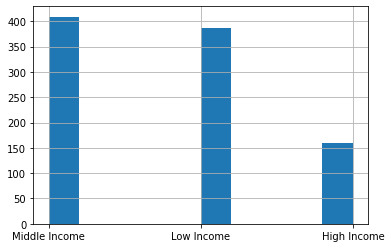

In [54]:
Customertravel.IncomeLevel.hist()

<AxesSubplot:>

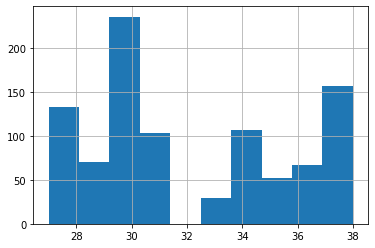

In [55]:
Customertravel.Age.hist()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'ServicesAcquired'}>],
       [<AxesSubplot:title={'center':'Churn'}>,
        <AxesSubplot:title={'center':'FrequentFlyerR'}>],
       [<AxesSubplot:title={'center':'IncomeLevelR'}>, <AxesSubplot:>]],
      dtype=object)

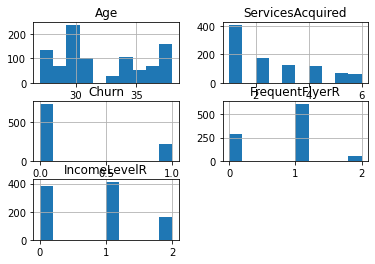

In [56]:
Customertravel.hist()

<AxesSubplot:xlabel='IncomeLevelR', ylabel='Density'>

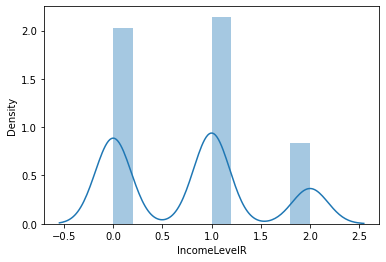

In [60]:
sns.distplot(Customertravel['IncomeLevelR'])

In [62]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

<AxesSubplot:>

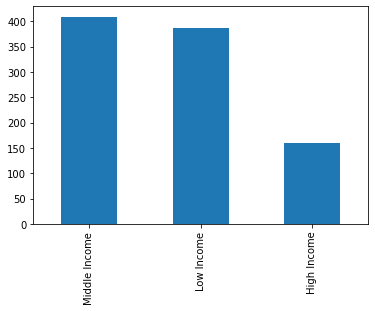

In [29]:
Customertravel['IncomeLevel'].value_counts().plot(kind='bar')

## 1=Customer Churn= Customer stop doing business  / 0= Customer doesn't Churn= Customers continue doing business

<AxesSubplot:>

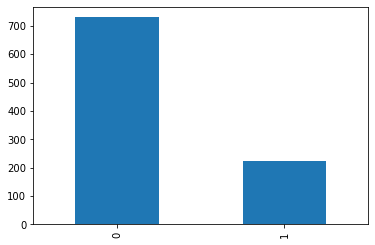

In [8]:
Customertravel['Churn'].value_counts().plot(kind='bar')

<AxesSubplot:>

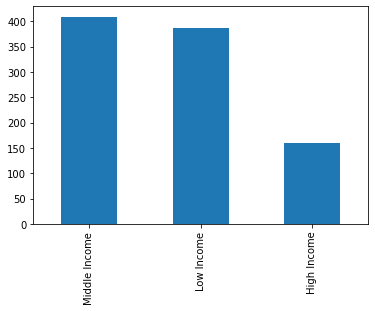

In [40]:
Customertravel['IncomeLevel'].value_counts().plot(kind='bar')